In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
def marcha_aleatoria(N: int, a=1, repeating=False):
    """
    Realiza la marcha aleatoria y devuelve la posición final. La particula da saltos de longitud a=1.

    Args: 
        N (int): numero de pasos
        a (int): longitud de cada paso
        repating (bool): ¿está repitiendo la medición muchas veces? no muestra el progreso individual si es así. 
    
    Returns:
        tuple: posicion final de la particula y dicha posicion al cuadrado
    """

    posibles_pasos = np.array([-a,a])

    x=0

    if repeating:
        for n in range(N):
            x += np.random.choice(posibles_pasos)
    else:
        print("Realizando marcha aleatoria...")
        for n in tqdm(range(N)):
            x += np.random.choice(posibles_pasos)

    return x,x**2

Punto 7
Parámetro establecido exitosamente.
Realizando marcha aleatoria...


100%|██████████| 5000/5000 [00:00<00:00, 81606.01it/s]


La posición final de la partícula después de 5000 pasos fue x=-36

Repitiendo la marcha 100 veces...


100%|██████████| 100/100 [00:03<00:00, 29.98it/s]


Text(0.5, 0, 'Posición (x)')

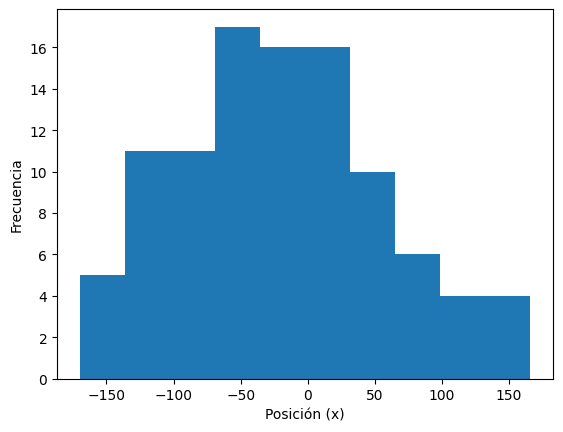

In [3]:
print("Punto 7")

def solicitar_parametro():
    """
    Solicita al usuario ingresar el parámetro N hasta recibir un entero válido.

    Returns:
        int: valor de N ingresado por el usuario.
    """

    while True:
        entrada = input("Escriba el valor deseado de N: ")
        try:
            param = int(entrada)
            print("Parámetro establecido exitosamente.")
            break   # si se pudo convertir, salimos del bucle
        except ValueError:
            print("No se detectó un entero. Vuelva a intentar ingresarlo.")
    return param

N = solicitar_parametro()

print(f"La posición final de la partícula después de {N} pasos fue x={marcha_aleatoria(N)[0]}")
n=100
print(f"\nRepitiendo la marcha {n} veces...")

Ns = np.zeros(n)

for i in tqdm(range(n)):
    Ns[i] = marcha_aleatoria(N, repeating=True)[0]

plt.hist(Ns)
plt.ylabel("Frecuencia")
plt.xlabel("Posición (x)")

Punto 8
Realizando 100 marchas aleatorias para 10 valores de N∈[0,5000] distintos...


10it [00:14,  1.44s/it]

Valores de <x> obtenidos:

N=1212 <x>=-3.66
N=109 <x>=-1.52
N=3049 <x>=4.16
N=346 <x>=1.26
N=3674 <x>=0.46
N=3234 <x>=-3.04
N=760 <x>=0.76
N=2869 <x>=4.12
N=3570 <x>=-2.4
N=3357 <x>=-8.94


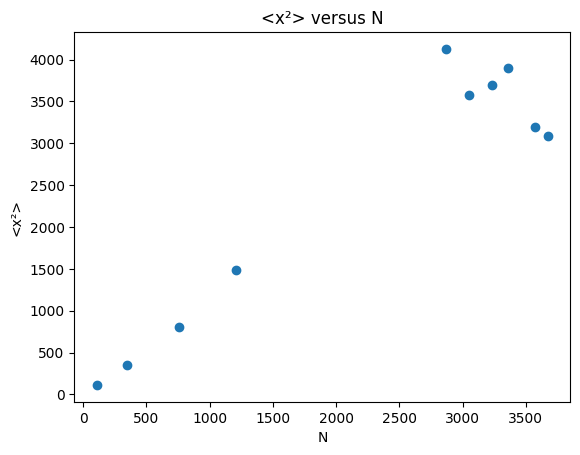

La constante de difusión es entonces D=0.516597, con 𝜏=1


In [ ]:
print("Punto 8")
num_Ns = 10
N_range = np.random.randint(0, N, size=num_Ns)

print(f"Realizando {n} marchas aleatorias para {num_Ns} valores de N∈[0,{N}] distintos...")

proms_X = np.zeros(num_Ns)
proms_X2 = np.zeros(num_Ns)
for j, N in tqdm(enumerate(N_range)):
    X = np.zeros(n)
    X2 = np.zeros(n)
    for i in range(n):
        X[i],X2[i] = marcha_aleatoria(N, repeating=True)
    proms_X[j] = np.mean(X)
    proms_X2[j] = np.mean(X2)

m, b = np.polyfit(N_range, proms_X2, 1) 
tau=1
D = m / (2*tau)

print("\nValores de <x> obtenidos:")
for i, x_prom in enumerate(proms_X):
    print(f"N={N_range[i]} <x>={x_prom}")


plt.scatter(N_range,proms_X2)
plt.title("<x²> versus N")
plt.ylabel("<x²>")
plt.xlabel("N")
plt.show()

print(f"La constante de difusión es entonces D={D:.6g}, con 𝜏=1")